Business forecasting:
- Is an act of predicting the future economic conditions on the basis of past and present information. It refers to the technique of taking a prospective view of things likely to shape the turn of things in foreseeable future.


LTFS receives a lot of requests for its various finance offerings that include housing loan, two-wheeler loan, real estate financing and micro loans. The number of applications received is something that varies a lot with season. Going through these applications is a manual process and is tedious. Accurately forecasting the number of cases received can help with resource and manpower management resulting into quick response on applications and more efficient processing.

You have been appointed with the task of forecasting daily cases for next 3 months for 2 different business segments at the country level keeping in consideration the following major Indian festivals (inclusive but not exhaustive list): Diwali, Dussehra, Ganesh Chaturthi, Navratri, Holi etc. (You are free to use any publicly available open source external datasets). Some other examples could be:

Weather
Macroeconomic variables
 Note that the external dataset must belong to a reliable source.


Data Dictionary
The train data has been provided in the following way:

For business segment 1, historical data has been made available at branch ID level
For business segment 2, historical data has been made available at State level.
 

Train File
Variable	Definition
application_date	Date of application
segment	Business Segment (1/2)
branch_id	Anonymised id for branch at which application was received
state	State in which application was received (Karnataka, MP etc.)
zone	Zone of state in which application was received (Central, East etc.)
case_count	(Target) Number of cases/applications received
 

Test File
Forecasting needs to be done at country level for the dates provided in test set for each segment.

Variable	Definition
id	Unique id for each sample in test set
application_date	Date of application
segment	Business Segment (1/2)
 
Sample Submission
This file contains the exact submission format for the forecasts. Please submit csv file only.

Variable	Definition
id	Unique id for each sample in test set
application_date	Date of application
segment	Business Segment (1/2)
case_count	(Target) Predicted values for test set
 
Note that you can only make 5 submissions per day


How to Make a Submission?


 

Evaluation
Evaluation Metric
The evaluation metric for scoring the forecasts is MAPE (Mean Absolute Percentage Error) M with the formula:

 




Where At is the actual value and Ft is the forecast value.


The Final score is calculated using MAPE for both the segments using the formula:



Important Notes

Note that feasibility of implementation of top solutions will be considered while adjudging winners
The solution must produce satisfactory results for both the business segments
 

Public and Private Split
Test data is further divided into Public (1st Month) and Private (Next 2 months)

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.
 

Guidelines for Final Submission
Please ensure that your final submission includes the following:

Solution file containing the predicted case count in the test dataset (format is given in sample submission csv)
Code file containing the following:
Code: Note that it is mandatory to submit your code for a valid final submission
External Datasets: Include any external dataset that you have used as an input variable
Approach: Please share your approach to solve the problem (doc/ppt/pdf format). It should cover the following topics:
A brief on the approach, which you have used to solve the problem. Mention the steps used for each segment separately.
What data-preprocessing / feature engineering ideas really worked? How did you discover them?
What does your final model look like? How did you reach it?
 

How to Set Final Submission?


Hackathon Rules
The final standings would be based on private leaderboard score and presentations made in Online Interview round with LTFS & Analytics Vidhya which will be held after contest close.
Setting the final submission is recommended. Without a final submission, the submission corresponding to best public score will be taken as the final submission
You can only make 5 submissions per day
Entries submitted after the contest is closed, will not be considered
The code file pertaining to your final submission is mandatory while setting final submission
Throughout the hackathon, you are expected to respect fellow hackers and act with high integrity.
Analytics Vidhya and LTFS hold the right to disqualify any participant at any stage of the competition if the participant(s) are deemed to be acting fraudulently.
Use of multiple IDs will lead to immediate disqualification

In [1]:
# Tracking Signal.



In [2]:
import pandas as pd
import numpy as np

In [3]:
cd Data

C:\Users\kotad\OneDrive\Desktop\Manipal\TERM_2\DataThon\LTFS\Data


In [4]:
data=pd.read_csv('train_fwYjLYX.csv')
data.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [5]:
data.dtypes

application_date     object
segment               int64
branch_id           float64
state                object
zone                 object
case_count          float64
dtype: object

In [6]:
parserDate=lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
data_dateParsed=pd.read_csv('train_fwYjLYX.csv',parse_dates=['application_date'],index_col='application_date',date_parser=parserDate)
data_dateParsed.head()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [7]:
df_segment_1=data_dateParsed[data_dateParsed['segment']==1]
df_segment_2=data_dateParsed[data_dateParsed['segment']==2]

In [8]:
#df_segment_1['2017-04-01':'2017-04-02']

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.hist(df_segment_2['case_count'])
plt.show()

<Figure size 500x500 with 1 Axes>

Augmented Dickey-Fuller test:

- Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.

- Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

- The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

- The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

- There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

- The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

- We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.



- ADF Statistic: -4.808291
- p-value: 0.000052
- Critical Values:
	- 5%: -2.870
	- 1%: -3.449
	- 10%: -2.571

Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

In [10]:
rolling_mean_1=df_segment_1['2017-04-01':'2017-04-05']['case_count'].rolling(12).mean()
rolling_std_1=df_segment_1['2017-04-01':'2017-04-05']['case_count'].rolling(12).std()
rolling_mean_2=df_segment_2['2017-04-01':'2017-04-05']['case_count'].rolling(12).mean()
rolling_std_2=df_segment_2['2017-04-01':'2017-04-05']['case_count'].rolling(12).std()



C:\Users\kotad\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


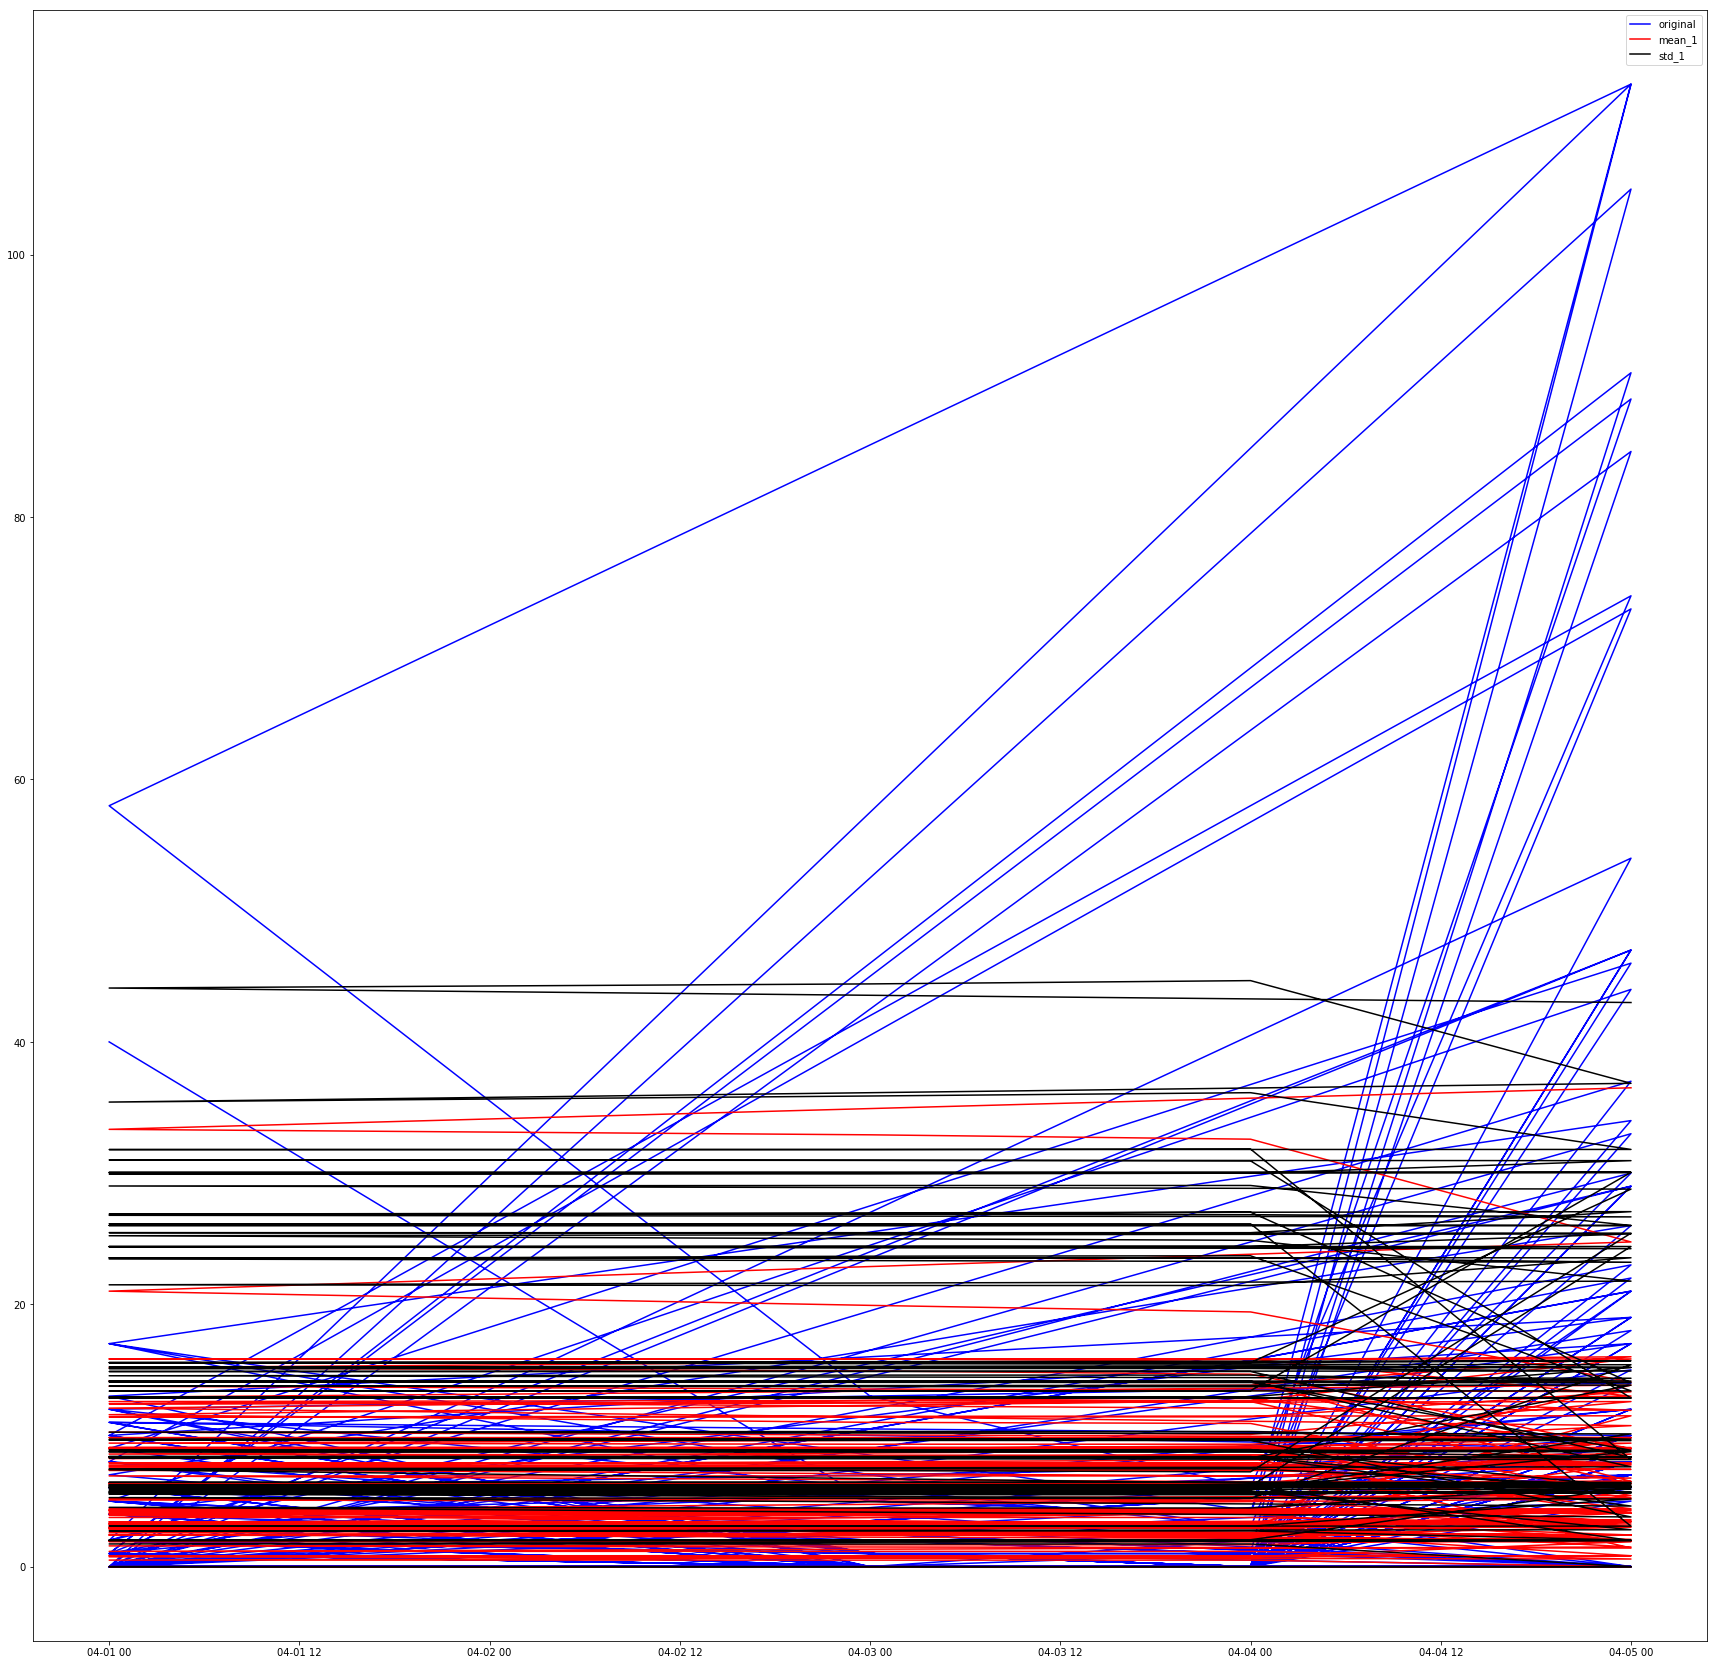

In [11]:
plt.figure(figsize=(30,30))
plt.plot(df_segment_1['2017-04-01':'2017-04-05']['case_count'],color='blue',label='original')
plt.plot(rolling_mean_1,color='red',label='mean_1')
plt.plot(rolling_std_1,color='black',label='std_1')
plt.legend(loc='best')
plt.show()

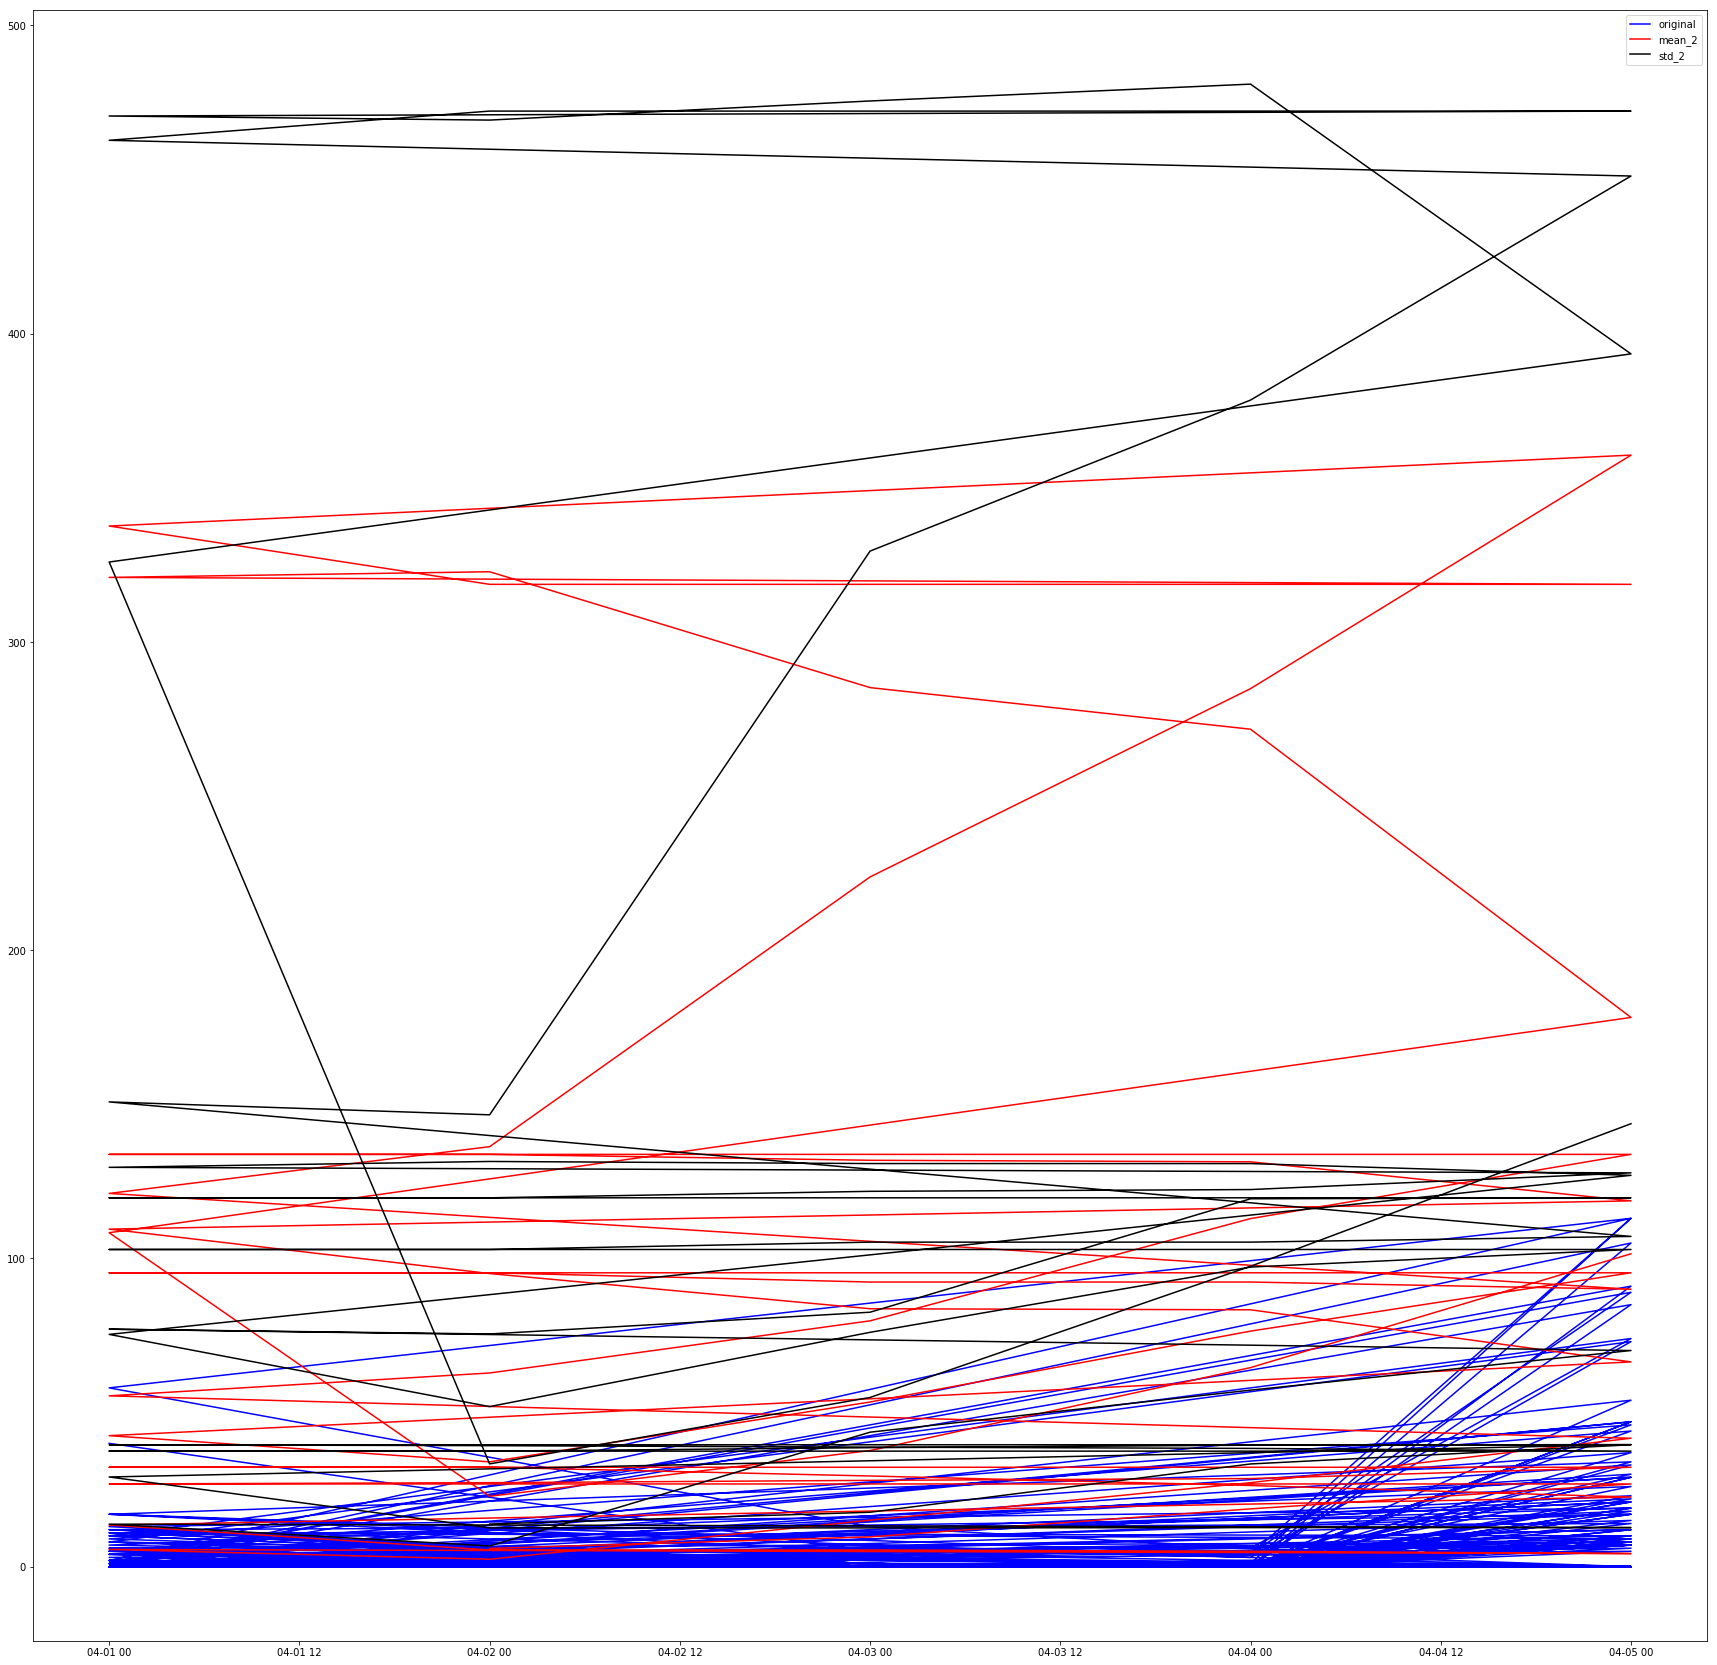

In [12]:
plt.figure(figsize=(30,30))
plt.plot(df_segment_1['2017-04-01':'2017-04-05']['case_count'],color='blue',label='original')
plt.plot(rolling_mean_2,color='red',label='mean_2')
plt.plot(rolling_std_2,color='black',label='std_2')
plt.legend(loc='best')
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test
dftest_1 = adfuller(df_segment_1['case_count'], autolag='AIC')
dfoutput_1 = pd.Series(dftest_1[0:4], 
                         index=['Test Statistic','p-value','#Lags Used',
                                'Number of Observations Used'])
    
for key,value in dftest_1[4].items():
    dfoutput_1['Critical Value (%s)'%key] = value
print(dfoutput_1)

Test Statistic                -8.817436e+00
p-value                        1.917340e-14
#Lags Used                     6.200000e+01
Number of Observations Used    6.683500e+04
Critical Value (1%)           -3.430448e+00
Critical Value (5%)           -2.861583e+00
Critical Value (10%)          -2.566793e+00
dtype: float64


In [14]:
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test
dftest_2 = adfuller(df_segment_2['case_count'], autolag='AIC')
dfoutput_2 = pd.Series(dftest_2[0:4], 
                         index=['Test Statistic','p-value','#Lags Used',
                                'Number of Observations Used'])
    
for key,value in dftest_2[4].items():
    dfoutput_2['Critical Value (%s)'%key] = value
print(dfoutput_2)

Test Statistic                    -3.140244
p-value                            0.023715
#Lags Used                        41.000000
Number of Observations Used    13462.000000
Critical Value (1%)               -3.430836
Critical Value (5%)               -2.861755
Critical Value (10%)              -2.566884
dtype: float64


# Data is Stationary

In [15]:
df_segment_1=df_segment_1[['branch_id','case_count']]

In [16]:
df_segment_1.head()

,branch_id,case_count
application_date,,
2017-04-01,1.0,40.0
2017-04-03,1.0,5.0
2017-04-04,1.0,4.0
2017-04-05,1.0,113.0
2017-04-07,1.0,76.0


In [17]:
df_segment_2[df_segment_2['case_count']!=0.0].head()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-07-27,2,NaN,ASSAM,NaN,38.0
2017-07-28,2,NaN,ASSAM,NaN,34.0
2017-07-29,2,NaN,ASSAM,NaN,33.0
2017-07-30,2,NaN,ASSAM,NaN,8.0
2017-07-31,2,NaN,ASSAM,NaN,22.0


In [18]:
from sklearn.model_selection import train_test_split


In [19]:
len(data)

80402

In [20]:
train_1=df_segment_1[0:int(0.8*(len(df_segment_1)))]

In [21]:
train_1.head()

,branch_id,case_count
application_date,,
2017-04-01,1.0,40.0
2017-04-03,1.0,5.0
2017-04-04,1.0,4.0
2017-04-05,1.0,113.0
2017-04-07,1.0,76.0


In [22]:
valid_1=df_segment_1[int(0.8*(len(df_segment_1))):]

In [23]:
valid_1.head()

,branch_id,case_count
application_date,,
2018-03-09,254.0,12.0
2018-03-10,254.0,9.0
2018-03-11,254.0,0.0
2018-03-12,254.0,18.0
2018-03-13,254.0,13.0


In [39]:
valid=pd.read_csv('test_1eLl9Yf.csv')

In [42]:
valid.head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [43]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=df_segment_1)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(df_segment_1))
#converting predictions to dataframe
cols=df_segment_1.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,2):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
#valid_1=valid_1.reset_index()[['branch_id','case_count']]
#for i in cols:
    #print('rmse value for', i, 'is : ', np.sqrt(np.square(np.subtract(valid_1[i],pred[i])).mean()))
    #print('rmse value for', i, 'is : ', np.sqrt(((pred[i] - valid_1[i]) ** 2).mean()))
#np.sqrt(((pred[i] - valid_1[i]) ** 2).mean())    
#np.square(np.subtract(valid_1[i],pred[i])).mean()

C:\Users\kotad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [45]:
#pred

In [46]:
model = VAR(endog=train_1)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=88)
#print(yhat)

C:\Users\kotad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [133]:
#Both AR and MA are integrated with difference 1
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_segment_1['case_count'], order=(2, 1, 2))  
results_ARIMA = model.fit()  
#plt.plot(ts_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

C:\Users\kotad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\kotad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [134]:
forecast_1 = results_ARIMA.forecast(steps=87)[0]

In [135]:
forecast_1

array([1.66962649, 1.80879957, 1.79605271, 1.76896288, 1.74123607,
       1.71421435, 1.68800651, 1.66259903, 1.63796701, 1.61408517,
       1.59092893, 1.56847453, 1.54669896, 1.52557999, 1.50509608,
       1.48522644, 1.46595094, 1.4472501 , 1.4291051 , 1.41149772,
       1.39441035, 1.37782594, 1.36172802, 1.34610063, 1.33092837,
       1.31619632, 1.30189006, 1.28799562, 1.27449953, 1.26138871,
       1.24865056, 1.23627286, 1.22424379, 1.21255193, 1.20118624,
       1.19013602, 1.17939094, 1.16894099, 1.15877651, 1.14888815,
       1.13926684, 1.12990386, 1.12079072, 1.11191924, 1.1032815 ,
       1.09486985, 1.08667687, 1.0786954 , 1.07091851, 1.0633395 ,
       1.05595188, 1.04874937, 1.04172592, 1.03487565, 1.0281929 ,
       1.02167216, 1.01530814, 1.00909569, 1.00302986, 0.99710583,
       0.99131896, 0.98566476, 0.98013887, 0.9747371 , 0.96945537,
       0.96428975, 0.95923644, 0.95429176, 0.94945215, 0.94471416,
       0.94007446, 0.93552984, 0.93107718, 0.92671346, 0.92243

In [136]:
df_segment_1.tail()

,branch_id,case_count
application_date,,
2019-07-01,271.0,6.0
2019-07-02,271.0,3.0
2019-07-03,271.0,3.0
2019-07-04,271.0,5.0
2019-07-05,271.0,0.0


In [139]:
len(date_1)

88

In [140]:
col=['application_date','segment','case_count']
date_1=pd.date_range(start='2019-07-05',end='2019-09-29')
seg=[1]*87
f_df_1=pd.DataFrame({'application_date':date_1,'segment':seg,'case_count':forecast_1})
f_df_1.head()

,application_date,segment,case_count
0,2019-07-05,1,1.669626
1,2019-07-06,1,1.808800
2,2019-07-07,1,1.796053
3,2019-07-08,1,1.768963
4,2019-07-09,1,1.741236


In [153]:
#Both AR and MA are integrated with difference 1
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_segment_2['case_count'], order=(2, 1, 2))  
results_ARIMA = model.fit()  
#plt.plot(ts_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [145]:
forecast_2 = results_ARIMA.forecast(steps=93)[0]

In [146]:
forecast_2

array([1876.36750423, 1822.67883383, 1745.59189114, 1706.83692358,
       1651.63302388, 1623.66858525, 1584.14242656, 1563.97397061,
       1535.68027945, 1521.14369956, 1500.89790951, 1490.4294196 ,
       1475.95004231, 1468.41977272, 1458.07224327, 1452.66392584,
       1445.27712272, 1441.4011105 , 1436.13592659, 1433.36632014,
       1429.62151462, 1427.65071915, 1424.99547296, 1423.60135765,
       1421.72695653, 1420.74912384, 1419.43434315, 1418.75698297,
       1417.84328757, 1417.38279028, 1416.75656608, 1416.45257466,
       1416.03239741, 1415.84134441, 1415.56885752, 1415.45929732,
       1415.29267536, 1415.24191335, 1415.15117813, 1415.14283672,
       1415.10650082, 1415.128762  , 1415.13142339, 1415.17575999,
       1415.20637829, 1415.26663808, 1415.31729911, 1415.38904364,
       1415.45407406, 1415.53410153, 1415.60943419, 1415.69543503,
       1415.7781542 , 1415.86846256, 1415.95647786, 1416.04989226,
       1416.141705  , 1416.23735897, 1416.33189464, 1416.42916

In [148]:
col=['application_date','segment','case_count']
date_1=pd.date_range(start='2019-07-05',end='2019-10-05')
seg=[2]*93
f_df_2=pd.DataFrame({'application_date':date_1,'segment':seg,'case_count':forecast_2})
f_df_2.head()

,application_date,segment,case_count
0,2019-07-05,2,1876.367504
1,2019-07-06,2,1822.678834
2,2019-07-07,2,1745.591891
3,2019-07-08,2,1706.836924
4,2019-07-09,2,1651.633024


In [149]:
df_final=f_df_1.append(f_df_2)

In [125]:
num

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [150]:
num=[i for i in range(1,181)]
df_final['index']=num

In [151]:
df_final_1=pd.DataFrame({'id':num,'application_date':df_final['application_date'],'segment':df_final['segment'],'case_count':df_final['case_count']})
df_final_1.set_index('id',inplace=True)
df_final_1.head()
df_final_1.to_csv('output_V1.csv')

In [152]:
df_final[df_final['segment']==2].shape

(93, 4)

In [ ]:
6,7,13,14,20,21,27,28

In [ ]:
2 8 27